<a href="https://colab.research.google.com/github/Milind-22CSU118/LabWork_DeepLearning/blob/main/DL_exp11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
# pip install -r requirements.txt
!pip install yfinance


In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching Data from yahoo finance

In [ ]:
START = "2012-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2012-01-03,12.375392,12.413611,12.308284,12.320321,302220800
1,2012-01-04,12.441893,12.479210,12.316704,12.338371,260022000
2,2012-01-05,12.580026,12.595674,12.418724,12.487338,271269600
3,2012-01-06,12.711538,12.722071,12.615841,12.632392,318292800
4,2012-01-09,12.691371,12.872535,12.679935,12.804824,394024400


In [ ]:
df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)

<ipython-input-7-b762d74b983a>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date','Open','High','Low', 'Volume'], axis = 1)


In [ ]:
df.head()

Price,Close
Ticker,AAPL
0,12.375392
1,12.441893
2,12.580026
3,12.711538
4,12.691371


# Plotting Closing Price

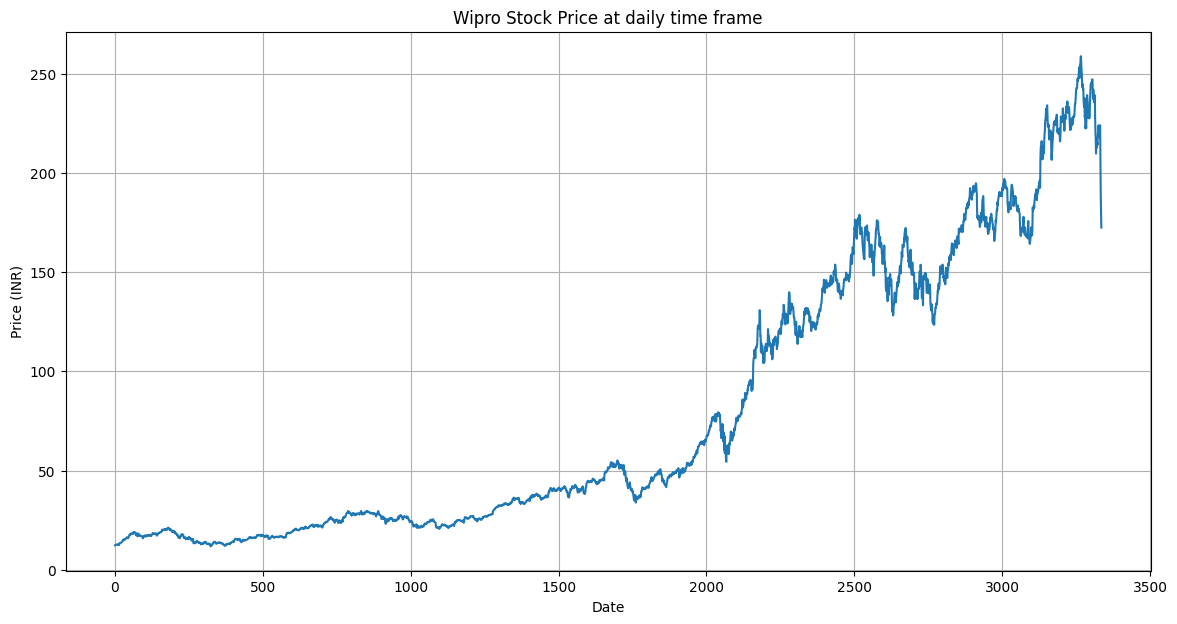

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title("Wipro Stock Price at daily time frame")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close
Ticker,AAPL
0,12.375392
1,12.441893
2,12.580026
3,12.711538
4,12.691371
...,...
3331,223.889999
3332,203.190002
3333,188.380005


In [ ]:
df.shape

(3336, 1)

# Dataset Spliting for training (70%) and testing (30%)

In [ ]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2012-01-03,12.375392,12.413611,12.308284,12.320321,302220800
1,2012-01-04,12.441893,12.479210,12.316704,12.338371,260022000
2,2012-01-05,12.580026,12.595674,12.418724,12.487338,271269600
3,2012-01-06,12.711538,12.722071,12.615841,12.632392,318292800
4,2012-01-09,12.691371,12.872535,12.679935,12.804824,394024400
...,...,...,...,...,...,...
3331,2025-04-02,223.889999,225.190002,221.020004,221.320007,35905900
3332,2025-04-03,203.190002,207.490005,201.250000,205.539993,103419000
3333,2025-04-04,188.380005,199.880005,187.339996,193.889999,125910900


In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])
print(data.shape)
print(train.shape)
print(test.shape)

(3336, 6)
(2335, 6)
(1001, 6)


In [ ]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2012-01-03,12.375392,12.413611,12.308284,12.320321,302220800
1,2012-01-04,12.441893,12.479210,12.316704,12.338371,260022000
2,2012-01-05,12.580026,12.595674,12.418724,12.487338,271269600
3,2012-01-06,12.711538,12.722071,12.615841,12.632392,318292800
4,2012-01-09,12.691371,12.872535,12.679935,12.804824,394024400


In [ ]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
2335,2021-04-15,131.573349,132.062469,130.732062,130.908153,89347100
2336,2021-04-16,131.240784,131.739681,130.379927,131.377737,84922400
2337,2021-04-19,131.905960,132.522256,130.438599,130.604898,94264200
2338,2021-04-20,130.213593,132.580933,128.941877,132.082035,94812300
2339,2021-04-21,130.595108,130.839668,128.442982,129.479914,68847100


# Dataset normalization by using MinMax scaler
---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
test

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
2335,2021-04-15,131.573349,132.062469,130.732062,130.908153,89347100
2336,2021-04-16,131.240784,131.739681,130.379927,131.377737,84922400
2337,2021-04-19,131.905960,132.522256,130.438599,130.604898,94264200
2338,2021-04-20,130.213593,132.580933,128.941877,132.082035,94812300
2339,2021-04-21,130.595108,130.839668,128.442982,129.479914,68847100
...,...,...,...,...,...,...
3331,2025-04-02,223.889999,225.190002,221.020004,221.320007,35905900
3332,2025-04-03,203.190002,207.490005,201.250000,205.539993,103419000
3333,2025-04-04,188.380005,199.880005,187.339996,193.889999,125910900


In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00367994],
       [0.0038205 ],
       [0.00498051],
       ...,
       [0.91722867],
       [0.91661925],
       [0.9356635 ]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2235, 100, 1)

#  LSTM Model

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

# First LSTM layer with more units and higher dropout rate
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))  # Higher dropout for better regularization

# Second LSTM layer with more units and higher dropout rate
model.add(LSTM(units=150, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # Slightly higher dropout rate

# Third LSTM layer with more units and dropout
model.add(LSTM(units=200, activation='relu', return_sequences=True))
model.add(Dropout(0.5))  # Dropout increased further to prevent overfitting

# Fourth LSTM layer with more units
model.add(LSTM(units=250, activation='relu'))
model.add(Dropout(0.5))  # Same dropout rate for the last layer

# Output layer
model.add(Dense(units=1))  # Prediction of stock price (regression problem)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 150)            │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 150)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 200)            │         280,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 200)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 250)                 │         451,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             251 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 923,451 (3.52 MB)

 Trainable params: 923,451 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

#  Model Training

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs =5)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - loss: 0.0311 - mean_absolute_error: 0.1082
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0023 - mean_absolute_error: 0.0296
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0021 - mean_absolute_error: 0.0280
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0020 - mean_absolute_error: 0.0276
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0019 - mean_absolute_error: 0.0267


In [ ]:
model.save('keras_model.h5')

In [ ]:
test_close.shape

(1001, 1)

In [ ]:
past_80_days = pd.DataFrame(train_close[-80:])

In [ ]:
test_df = pd.DataFrame(test_close)

# Defining the final test dataset by including the last 100 rows of the training dataset to predict the first column of the testing dataset.

---


In [ ]:
# final_df = past_80_days.append(test_df, ignore_index = True)
final_df = pd.concat([past_80_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,125.907069
1,125.965677
2,122.117166
3,128.554151
4,129.091408


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.06692108],
       [0.06733537],
       [0.04013096],
       ...,
       [0.54747977],
       [0.42950125],
       [0.49665498]])

In [ ]:
input_data.shape

(1081, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(80, input_data.shape[0]):
   x_test.append(input_data[i-80: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1001, 80, 1)
(1001,)


# Prediction of Closing Price and plotting the Graph

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


In [ ]:
y_pred.shape

(1001, 1)

In [ ]:
y_test

array([0.10227281, 0.10559222, 0.10012916, ..., 0.54747977, 0.42950125,
       0.49665498])

In [ ]:
y_pred

array([[0.02635356],
       [0.02674406],
       [0.02740007],
       ...,
       [0.7216092 ],
       [0.71791494],
       [0.71317255]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00706881])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor
y_pred

array([[  62.79591 ],
       [  63.726402],
       [  65.28956 ],
       ...,
       [1719.4681  ],
       [1710.6654  ],
       [1699.3652  ]], dtype=float32)

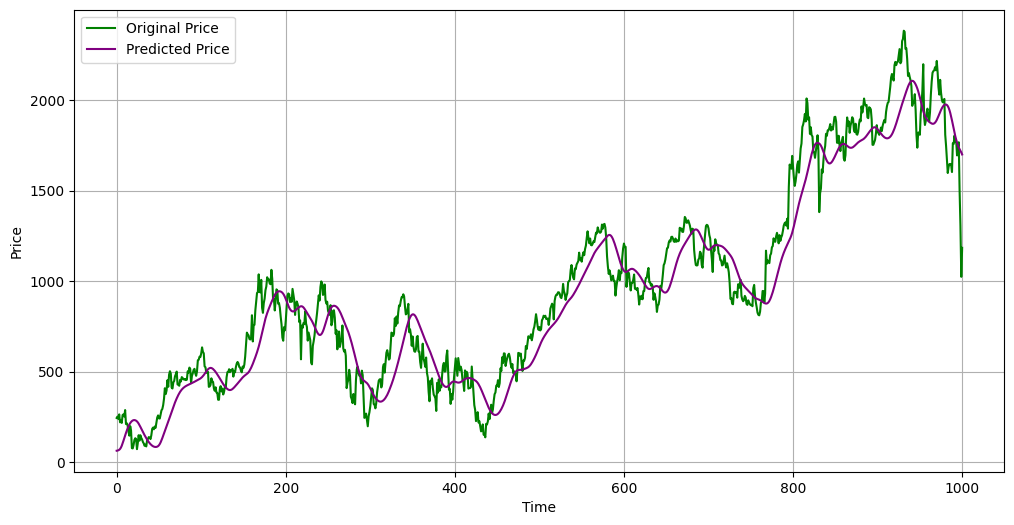

In [ ]:
import matplotlib.pyplot as plt

#  y_test and y_pred are  data arrays
plt.figure(figsize=(12, 6))

# Custom colors: Green for Original Price and Purple for Predicted Price
plt.plot(y_test, 'g', label="Original Price")  # Green
plt.plot(y_pred, '#800080', label="Predicted Price")  # Purple using hex code

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

Calculation of mean absolute error and R2 Score

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


Mean absolute error on test set: 13.29%


In [ ]:
from sklearn.metrics import r2_score
actual = y_test
predicted = y_pred
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: 0.9202317225578784


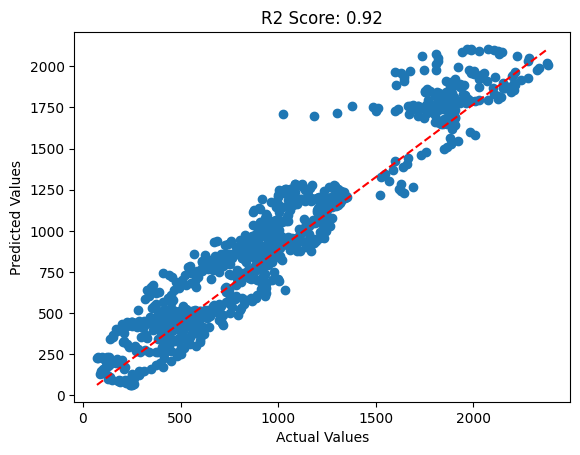

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()